**Getting data from the movie DB**


1- Getting the genres id 

2- Getting popular people

In [1]:
#import api key for the movie database
import config
api_key = config.api_key

In [11]:
# Create a funtion to get the genres info using my api key
import requests 

def genre_call(key):
    #from the template given in themoviedb replace the string api_key by the key
    url_format = 'https://api.themoviedb.org/3/genre/movie/list?api_key=<<api_key>>&language=en-US'
    url_to_be_used = url_format.replace('<<api_key>>',key)
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url_to_be_used, headers=headers)
    #from the data called I select only the genres
    data = response.json()['genres']
    return data

In [12]:
#Use the function to create a list to hold the genres id and the genres
# the list will be used for mapping the genres
genres_list = genre_call(api_key)
genres_list

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [13]:
# Create a function that can pull info re popular people given a number of pages (20 names by pages)
def popular_call(key):
    #create a variable pages to hold the number of pages I want to get the info for
    pages = list(range(15))
    people_list = []
    for page in pages:
        url_format = 'https://api.themoviedb.org/3/person/popular?api_key=<<api_key>>&language=en-US&page=X'
        url_with_api= url_format.replace('<<api_key>>',key)
        #create the url by concatenate the url format and the correct page
        url_to_be_used = url_with_api.replace('=X','='+ str(page+1))
        headers = {'Authorization': 'Bearer {}'.format(api_key)}
        response = requests.get(url_to_be_used, headers=headers)
        data = response.json()['results']
        people_list.extend(data)
    return people_list

In [14]:
#Get a list of popular people
popular_people_i = popular_call(api_key)

In [15]:
#use the variable to understand the data 
popular_people_i

[{'popularity': 45.359,
  'id': 1449329,
  'profile_path': '/stTlg9uSNA6J81a0RmoQBprcQmf.jpg',
  'name': 'Jack Bannon',
  'known_for': [{'vote_average': 8.1,
    'vote_count': 10610,
    'id': 205596,
    'video': False,
    'media_type': 'movie',
    'title': 'The Imitation Game',
    'popularity': 26.643,
    'poster_path': '/noUp0XOqIcmgefRnRZa1nhtRvWO.jpg',
    'original_language': 'en',
    'original_title': 'The Imitation Game',
    'genre_ids': [36, 18, 53, 10752],
    'backdrop_path': '/qcb6z1HpokTOKdjqDTsnjJk0Xvg.jpg',
    'adult': False,
    'overview': "Based on the real life story of legendary cryptanalyst Alan Turing, the film portrays the nail-biting race against time by Turing and his brilliant team of code-breakers at Britain's top-secret Government Code and Cypher School at Bletchley Park, during the darkest days of World War II.",
    'release_date': '2014-11-14'},
   {'vote_average': 7.4,
    'vote_count': 6785,
    'id': 228150,
    'video': False,
    'media_type':

In [16]:
# Get a function that will select only the pair key/value that we want in our DB
def create_list_db(pop_people):
    popular_people_list = []
    popular_list_fin = []
    dict_people = {}
    dict_people_ii = {}
    for popular_person in pop_people:
        
        # a list of keys of the new dict
        new_keys = ['id','popularity','name','known_for']
        # dictionary comprehension 
        dict_people = {k: popular_person[k] for k in new_keys}
        
        popular_people_list.append(dict_people)
    
    #a for loop to go one step further in the 'known_for'
    for x in range(len(popular_people_list)):
        holder = popular_people_list[x]['known_for']
        dict_people_ii = {'id': popular_people_list[x]['id'],'popularity': popular_people_list[x]['popularity'],
                          'name': popular_people_list[x]['name'],'known_for': holder[0]}
        
        popular_list_fin.append(dict_people_ii)
#         print(holder)
    
    return popular_list_fin       

In [17]:
#Use the function to get in a list reduced info
list_with_popular_people = create_list_db(popular_people_i)

In [18]:
list_with_popular_people

[{'id': 1449329,
  'popularity': 45.359,
  'name': 'Jack Bannon',
  'known_for': {'vote_average': 8.1,
   'vote_count': 10610,
   'id': 205596,
   'video': False,
   'media_type': 'movie',
   'title': 'The Imitation Game',
   'popularity': 26.643,
   'poster_path': '/noUp0XOqIcmgefRnRZa1nhtRvWO.jpg',
   'original_language': 'en',
   'original_title': 'The Imitation Game',
   'genre_ids': [36, 18, 53, 10752],
   'backdrop_path': '/qcb6z1HpokTOKdjqDTsnjJk0Xvg.jpg',
   'adult': False,
   'overview': "Based on the real life story of legendary cryptanalyst Alan Turing, the film portrays the nail-biting race against time by Turing and his brilliant team of code-breakers at Britain's top-secret Government Code and Cypher School at Bletchley Park, during the darkest days of World War II.",
   'release_date': '2014-11-14'}},
 {'id': 2226464,
  'popularity': 38.811,
  'name': 'Ankita Dave',
  'known_for': {'original_name': 'Singardaan',
   'id': 86184,
   'media_type': 'tv',
   'name': 'Singarda

In [19]:
#filter the list of all the data to remove the one missing a key in the nested dict w/ key: known_for
# I didn't use lambda due to the nested dict

filtered_popular_people = []
dict_people_iii = {}
keyValList = ['vote_average','vote_count','id','video','media_type','title','popularity','poster_path','original_language','original_title','genre_ids','backdrop_path','adult','overview','release_date']
for x in range(len(list_with_popular_people)):
    if list(list_with_popular_people[x]['known_for'].keys()) == keyValList:
        dict_people_iii = {'id': list_with_popular_people[x]['id'],'popularity': list_with_popular_people[x]['popularity'],
                            'name': list_with_popular_people[x]['name'],'genres': list_with_popular_people[x]['known_for']['genre_ids'],
                          'title': list_with_popular_people[x]['known_for']['title']}
        filtered_popular_people.append(dict_people_iii)

In [20]:
filtered_popular_people

[{'id': 1449329,
  'popularity': 45.359,
  'name': 'Jack Bannon',
  'genres': [36, 18, 53, 10752],
  'title': 'The Imitation Game'},
 {'id': 3223,
  'popularity': 38.073,
  'name': 'Robert Downey Jr.',
  'genres': [878, 28, 12],
  'title': 'The Avengers'},
 {'id': 1119039,
  'popularity': 32.96,
  'name': 'Mari Nagisa',
  'genres': [80, 18],
  'title': 'Inflatable Sex Doll of The Wastelands'},
 {'id': 1951,
  'popularity': 32.41,
  'name': 'Elisabeth Shue',
  'genres': [12, 35, 10751, 878],
  'title': 'Back to the Future Part II'},
 {'id': 1245,
  'popularity': 30.205,
  'name': 'Scarlett Johansson',
  'genres': [878, 28, 12],
  'title': 'The Avengers'},
 {'id': 1119054,
  'popularity': 28.591,
  'name': 'Mitsugu Fujii',
  'genres': [12, 28],
  'title': 'The Thirteen Assassins'},
 {'id': 122158,
  'popularity': 25.139,
  'name': 'Saori Hara',
  'genres': [18, 12, 10749],
  'title': '3-D Sex and Zen: Extreme Ecstasy'},
 {'id': 6885,
  'popularity': 21.513,
  'name': 'Charlize Theron',
 

In [21]:
# -------------- DATA CLEANING ---------------------

#filter the list of all the data to remove the one missing a key in the nested dict w/ key: known_for
# I didn't use lambda due to the nested dict

filtered_popular_people = []
dict_people_iii = {}
keyValList = ['vote_average','vote_count','id','video','media_type','title','popularity','poster_path','original_language','original_title','genre_ids','backdrop_path','adult','overview','release_date']
for x in range(len(list_with_popular_people)):
    #first condition to check the selected data have all the keys
    if list(list_with_popular_people[x]['known_for'].keys()) == keyValList:
        #second condition to check I picked the one with genres
        if len(list_with_popular_people[x]['known_for']['genre_ids']) != 0:
            dict_people_iii = {'id': list_with_popular_people[x]['id'],'popularity': list_with_popular_people[x]['popularity'],
                              'name': list_with_popular_people[x]['name'].replace("'"," "),'genres': list_with_popular_people[x]['known_for']['genre_ids'][0],
                          'title': list_with_popular_people[x]['known_for']['title'].replace("'"," ")}
            filtered_popular_people.append(dict_people_iii)            

In [31]:
len(filtered_popular_people)

272

In [33]:
#function to remove duplicates

def remove_duplicate(dup_list):
    seen = set()
    no_dup_list = []
    for the_dict in dup_list:
        test = tuple(the_dict.items())
        if test not in seen:
            seen.add(test)
            no_dup_list.append(the_dict)
    return (no_dup_list)

#call function on list of bars to remove duplicates
filtered_popular_people = remove_duplicate(filtered_popular_people)
filtered_popular_people

271

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
# add 2 tables in the DB: one for genres and one for all the popular people

In [35]:
# getting packages for mySQL and password for AWS
import mysql.connector
from mysql.connector import errorcode
import config

In [36]:
# To connect to the DB
cnx = mysql.connector.connect(
        host = config.host,
        user = config.user,
        passwd = config.password,
        database = 'microflix'
)
my_cursor = cnx.cursor()

In [37]:
my_cursor

In [38]:
# Create a table for the genres map and for the popular people

# Add the text for the queries into a dictionnary
TABLES = {}
TABLES['genres_mapping'] = (
    "CREATE TABLE genres_mapping ("
    "  genre_id INT(5) NOT NULL,"
    "  genre_name varchar(120),"
    "  PRIMARY KEY (genre_id)"
    ") ENGINE=InnoDB")

TABLES['popular_people'] = (
    "CREATE TABLE popular_people ("
    "  person_id int(10) NOT NULL,"
    "  popularity FLOAT(10,4),"
    "  person_name varchar(50),"
    "  genre_id int(5) NOT NULL,"
    "  title varchar(100),"
    "  PRIMARY KEY (person_id),"
    "  CONSTRAINT FOREIGN KEY (genre_id) "
    "  REFERENCES genres_mapping (genre_id) ON DELETE CASCADE"
    ") ENGINE=InnoDB")

In [39]:
# Run the script for creating the tables

for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        my_cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

Creating table genres_mapping: already exists.
Creating table popular_people: OK


In [40]:
# To close after use
my_cursor.close()
cnx.close()

In [41]:
#adding data into the genres tables
cnx = mysql.connector.connect(
        host = config.host,
        user = config.user,
        passwd = config.password,
        database = 'microflix'
    )
my_cursor = cnx.cursor()
for genre in genres_list:
    
    print(f"INSERT INTO genres_mapping (genre_id, genre_name) VALUES ('{genre['id']}', '{genre['name']}')")
    my_cursor.execute(f"INSERT INTO genres_mapping (genre_id, genre_name) VALUES ('{genre['id']}', '{genre['name']}')")

    cnx.commit()
                      
# close after use
my_cursor.close()
cnx.close()

INSERT INTO genres_mapping (genre_id, genre_name) VALUES ('28', 'Action')


IntegrityError: 1062 (23000): Duplicate entry '28' for key 'PRIMARY'

In [42]:
#adding data into the genres tables
cnx = mysql.connector.connect(
        host = config.host,
        user = config.user,
        passwd = config.password,
        database = 'microflix'
    )
my_cursor = cnx.cursor()
for filtered_popular_person in filtered_popular_people:
    
    print(f"INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('{filtered_popular_person['id']}','{filtered_popular_person['popularity']}','{filtered_popular_person['name']}','{filtered_popular_person['genres']}','{filtered_popular_person['title']}')")
    my_cursor.execute(f"INSERT INTO popular_people (person_id, popularity, person_name, genre_id, title) VALUES ('{filtered_popular_person['id']}','{filtered_popular_person['popularity']}','{filtered_popular_person['name']}','{filtered_popular_person['genres']}','{filtered_popular_person['title']}')")

    cnx.commit()

INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('1449329','45.359','Jack Bannon','36','The Imitation Game')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('3223','38.073','Robert Downey Jr.','878','The Avengers')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('1119039','32.96','Mari Nagisa','80','Inflatable Sex Doll of The Wastelands')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('1951','32.41','Elisabeth Shue','12','Back to the Future Part II')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('1245','30.205','Scarlett Johansson','878','The Avengers')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('1119054','28.591','Mitsugu Fujii','12','The Thirteen Assassins')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('122158','25.139','Saori Hara','18','3

INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('75041','10.389','Cameron Boyce','35','Grown Ups')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('2888','10.284','Will Smith','28','Suicide Squad')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('15152','10.224','James Earl Jones','12','Star Wars')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('10859','10.198','Ryan Reynolds','28','Deadpool')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('505710','10.14','Zendaya','28','Spider-Man: Homecoming')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('85','10.12','Johnny Depp','12','Pirates of the Caribbean: The Curse of the Black Pearl')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('16483','10.036','Sylvester Stallone','28','Guardians of the Galaxy Vol.

INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('17604','8.252','Jeremy Renner','878','The Avengers')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('8167','8.186','Paul Walker','28','Fast & Furious 6')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('8691','8.177','Zoe Saldana','28','Avatar')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('62064','8.172','Chris Pine','28','Wonder Woman')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('1922','8.169','Catherine Zeta-Jones','53','Ocean s Twelve')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('15277','8.122','Jon Favreau','28','Iron Man')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('10912','8.108','Eva Green','18','Miss Peregrine s Home for Peculiar Children')
INSERT INTO popular_people (person_i

INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('532','7.022','Joe Pantoliano','28','The Matrix')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('10990','7.021','Emma Watson','12','Harry Potter and the Philosopher s Stone')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('9594','7.02','Katharine Ross','14','Donnie Darko')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('1269','7.015','Kevin Costner','28','Batman v Superman: Dawn of Justice')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('59315','7.014','Olivia Wilde','10749','Her')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('10222','6.997','Roger Moore','28','Moonraker')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('18973','6.997','Mila Kunis','18','Black Swan')
INSERT INTO popular_people (p

INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('1243','6.447','Woody Allen','14','Midnight in Paris')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('5292','6.443','Denzel Washington','53','The Equalizer')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('4785','6.432','Jeff Goldblum','28','Guardians of the Galaxy Vol. 2')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('27428','6.408','Aaron Taylor-Johnson','28','Avengers: Age of Ultron')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('9281','6.404','Elizabeth Banks','878','The Hunger Games')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('139','6.399','Uma Thurman','53','Pulp Fiction')
INSERT INTO popular_people (person_id, popularity, name, genre_id, title) VALUES ('56734','6.393','Chloë Grace Moretz','28','Kick-Ass')
INSERT INTO

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
                                                                **------------------------------------------------------------------------------------- ANALYSIS ---------------------------------------------------------------------------**

In [ ]:
#Creating two graphs to represent our data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# getting packages for mySQL and password for AWS
import mysql.connector
from mysql.connector import errorcode
import config

%matplotlib inline

In [6]:
!pip install pandasql

In [7]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [14]:
#create a function to query from the SQL DB


def run_queries(query,action=0):
    cnx = mysql.connector.connect(
        host = config.host,
        user = config.user,
        passwd = config.password,
        database = 'microflix'
    )
    my_cursor = cnx.cursor()
    my_cursor.execute(query)
    df = pd.DataFrame(my_cursor.fetchall()) #Take results and create dataframe
    df.columns = [i[0] for i in my_cursor.description]
    #I add a condition just in case I want to see the head or the entire data
    if action == 1:
        return df
    else:    
        return df.head()

In [16]:
query_1 = """ SELECT a.person_name, b.genre_name, a.genre_id, a.popularity, a.title 
              FROM popular_people a, genres_mapping b
              WHERE a.genre_id = b.genre_id;"""

all_people = run_queries(query_1,1)
sample_all_people = run_queries(query_1)
# sample_all_people
len(all_people)

271

In [152]:
query_2 = """SELECT b.genre_name, COUNT(a.person_name) total_actor, ROUND(AVG(a.popularity),2) avg_pop, ROUND(MIN(a.popularity),2) min_pop, ROUND(MAX(a.popularity),2) max_pop, ROUND(STD(a.popularity),2) std_pop
            FROM popular_people a, genres_mapping b 
            WHERE a.genre_id = b.genre_id
            GROUP BY b.genre_name
            ORDER by total_actor DESC;"""

genres_popularity = run_queries(query_2,1)

genres_popularity


,genre_name,total_actor,avg_pop,min_pop,max_pop,std_pop
0,Action,100,9.14,6.17,21.51,3.23
1,Adventure,41,9.88,6.18,32.41,5.34
2,Drama,40,8.86,6.31,25.14,3.58
3,Science Fiction,20,12.52,6.40,38.07,8.10
4,Comedy,18,9.02,6.20,16.18,3.03
5,Fantasy,11,8.41,6.22,20.43,3.98
6,Thriller,10,7.10,6.21,8.17,0.77
7,Animation,10,7.27,6.18,9.40,1.05
8,Horror,6,8.31,6.35,15.89,3.42
9,Romance,5,8.21,6.62,11.10,1.68


In [154]:
query_3 = """SELECT genre, FORMAT(ROUND(SUM(tickets_sold),2),0) total_tickets, FORMAT(ROUND(AVG(tickets_sold),2),0) avg_tickets, 
FORMAT(ROUND(MIN(tickets_sold),2),0) min_tickets, FORMAT(ROUND(MAX(tickets_sold),2),0) max_tickets, 
FORMAT(ROUND(STD(tickets_sold),2),0) std_tickets 
FROM microflix.genredata
GROUP BY 1
ORDER by SUM(tickets_sold) DESC"""

run_queries(query_3,1)

,genre,total_tickets,avg_tickets,min_tickets,max_tickets,std_tickets
0,Adventure,"8,916,057,415","356,642,297","177,358,047","485,184,060","81,261,120"
1,Action,"6,661,480,566","266,459,223","160,395,751","447,980,568","65,281,650"
2,Drama,"5,605,057,723","224,202,309","147,887,868","59,218,835","66,107,107"
3,Comedy,"5,202,974,960","208,118,998","131,991,738","94,998,758","68,949,733"
4,Thriller-or-Suspense,"2,766,121,824","110,644,873","106,186,358","82,084,039","34,283,549"
5,Horror,"1,654,532,281","66,181,291","100,803,180","98,962,594","23,641,973"
6,Romantic-Comedy,"1,594,642,257","63,785,690","104,925,831","98,946,512","35,667,453"
7,Musical,"538,602,239","22,441,760","10,411,454","99,237,710","20,636,455"
8,Documentary,"332,823,078","13,312,923","10,283,847","7,720,431","8,321,274"
9,Black-Comedy,"213,756,572","8,550,263","10,071,918","9,875,365","6,023,462"


In [26]:
query_4 = """SELECT b.genre_name, a.person_name actor, a.popularity, a.title
            FROM popular_people a, genres_mapping b 
            WHERE a.genre_id = b.genre_id
            ORDER BY popularity DESC
            LIMIT 25;"""

most_popular = run_queries(query_4,1)

most_popular

,genre_name,actor,popularity,title
0,History,Jack Bannon,45.359,The Imitation Game
1,Science Fiction,Robert Downey Jr.,38.073,The Avengers
2,Crime,Mari Nagisa,32.960,Inflatable Sex Doll of The Wastelands
3,Adventure,Elisabeth Shue,32.410,Back to the Future Part II
4,Science Fiction,Scarlett Johansson,30.205,The Avengers
5,Adventure,Mitsugu Fujii,28.591,The Thirteen Assassins
6,Drama,Saori Hara,25.139,3-D Sex and Zen: Extreme Ecstasy
7,Action,Charlize Theron,21.513,Mad Max: Fury Road
8,Science Fiction,Chris Evans,21.047,The Avengers
9,Action,Keanu Reeves,20.955,The Matrix


In [106]:
import seaborn as sns
sns.set()

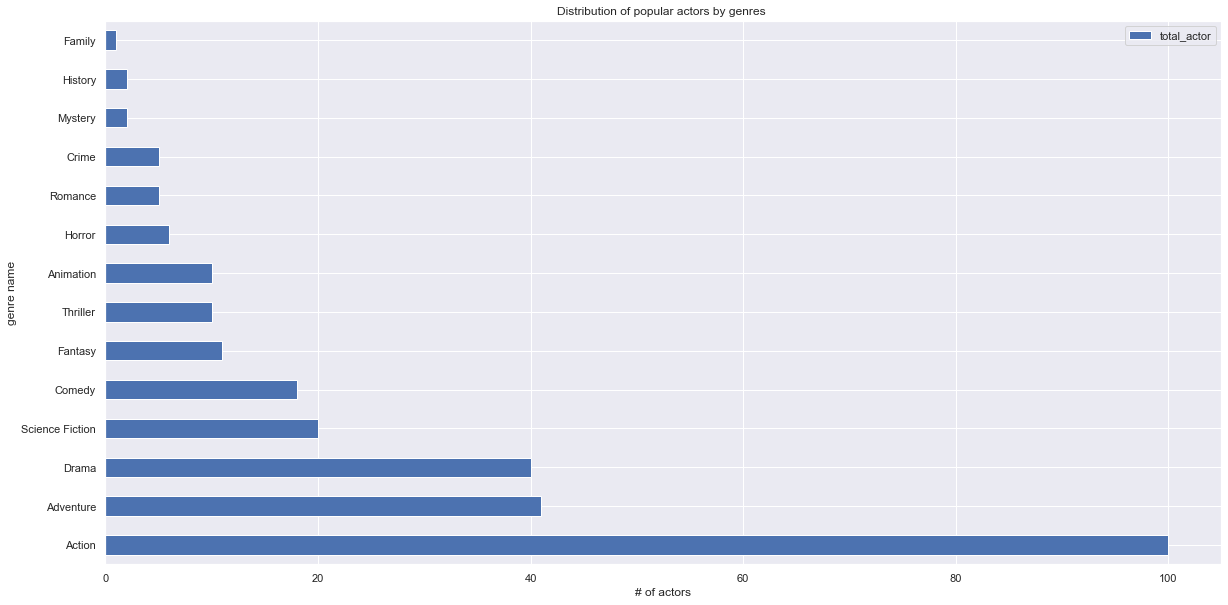

In [136]:
# Create and label the histograms for each below!

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

genres_popularity.set_index('genre_name')['total_actor'].plot(kind='barh', ax=axes)
axes.set_title('Distribution of popular actors by genres ')
axes.set_xlabel("# of actors")
axes.set_ylabel("genre name")
axes.legend()

plt.savefig('pic1.png', bbox_inches='tight')